In [6]:
import numpy as np
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
cv_results = pd.read_csv("../experiments/train_test/Price/a_laplacian/task 4/models_a_laplacian_gridsearch.csv")


In [15]:
# convert gamma to log_2 and C to log 10
cv_results["log2_param_gamma"]=np.log2(cv_results["param_gamma"])


tens=[10e-6,10e-5,10e-4,10e-3,10e-2,10e-1,10e-0, 10e1]
np.ravel([[i]*12 for i in tens])
cv_results["10_param_C"]=np.ravel([[i]*13 for i in tens])
cv_results["log_10_param_C"]=np.log10(cv_results["10_param_C"])


In [16]:
# credit https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw=None, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current Axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=False, bottom=True,
                   labeltop=False, labelbottom=True)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels())

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [75]:
1/(1632*10e-5)

6.127450980392156

In [69]:
pvt=pd.pivot_table(cv_results,index=["param_C"], columns=["param_gamma"], values="mean_test_score")
pvt


param_gamma,0.015625,0.031250,0.062500,0.125000,0.250000,0.500000,1.000000,2.000000,4.000000,8.000000,16.000000,32.000000,64.000000
param_C,,,,,,,,,,,,,
0.000006,-10.372830,-10.372308,-10.370175,-10.369507,-10.369608,-10.369791,-10.366661,-10.360179,-10.357059,-10.358200,-10.361342,-10.364378,-10.368031
0.000064,-10.370521,-10.370506,-10.370278,-10.370414,-10.369255,-10.360641,-10.327461,-10.269690,-10.234142,-10.252037,-10.286197,-10.323278,-10.346731
0.000641,-10.371212,-10.371188,-10.371046,-10.369611,-10.354194,-10.268305,-9.980478,-9.561818,-9.340002,-9.418539,-9.663724,-9.924330,-10.114978
0.006410,-10.369764,-10.369465,-10.367233,-10.347441,-10.204941,-9.538169,-8.633625,-8.223653,-8.133522,-8.124631,-8.167774,-8.347214,-8.794037
0.064103,-10.360444,-10.357605,-10.337122,-10.169728,-9.192798,-8.262734,-7.641417,-7.285332,-7.314051,-7.511153,-7.670917,-7.776166,-7.951173
0.641026,-10.504217,-10.487018,-10.372702,-9.706848,-8.377897,-7.599474,-7.173987,-6.869522,-6.701036,-6.748122,-7.048489,-7.363306,-7.550412
6.410256,-11.163456,-11.139942,-10.981249,-10.126117,-8.375331,-7.459909,-7.114687,-7.055641,-6.955479,-6.682481,-6.545984,-6.715369,-7.047854
64.102564,-11.163456,-11.139942,-10.981249,-10.126117,-8.375331,-7.459909,-7.129997,-7.163307,-7.345122,-7.402299,-7.137924,-6.894922,-6.713925


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

Text(0.5, 1.0, 'Cross validation Absolute Laplacian')

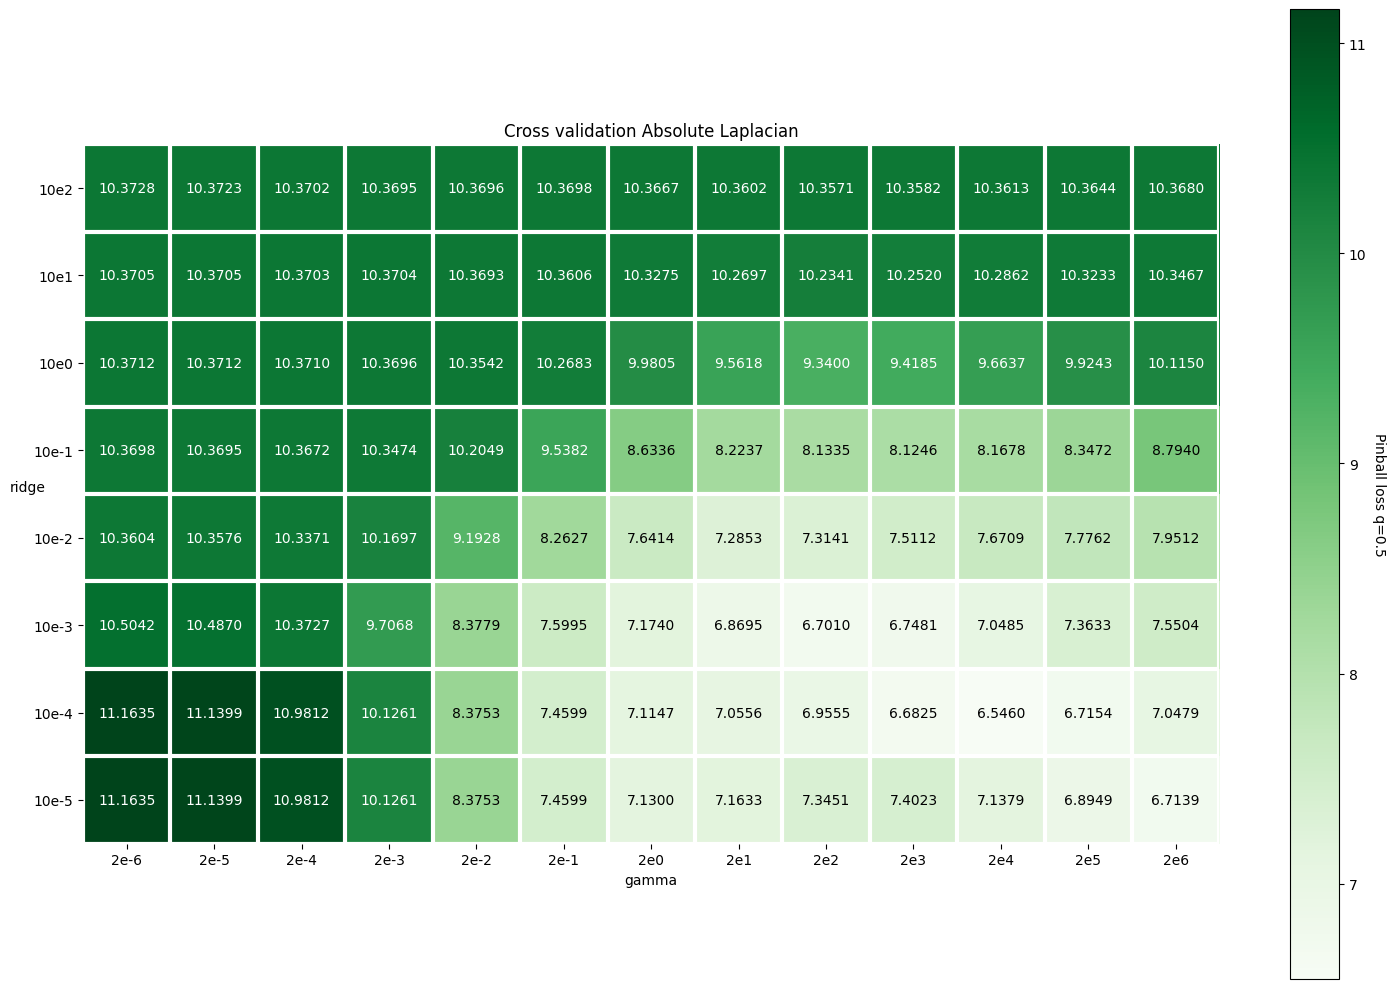

In [88]:
fig, ax = plt.subplots(figsize=(15,10))

im, cbar = heatmap(-pvt.values, [f"10e{i}" for i in range(2,-6,-1)], [f"2e{i}" for i in range(-6,7)], ax=ax,
                   cmap="Greens", cbarlabel="Pinball loss q=0.5")
texts = annotate_heatmap(im, valfmt="{x:.4f}")

fig.tight_layout();

ax.set_xlabel("gamma")
ax.set_ylabel("ridge",rotation=0)
ax.set_title("Cross validation Absolute Laplacian")


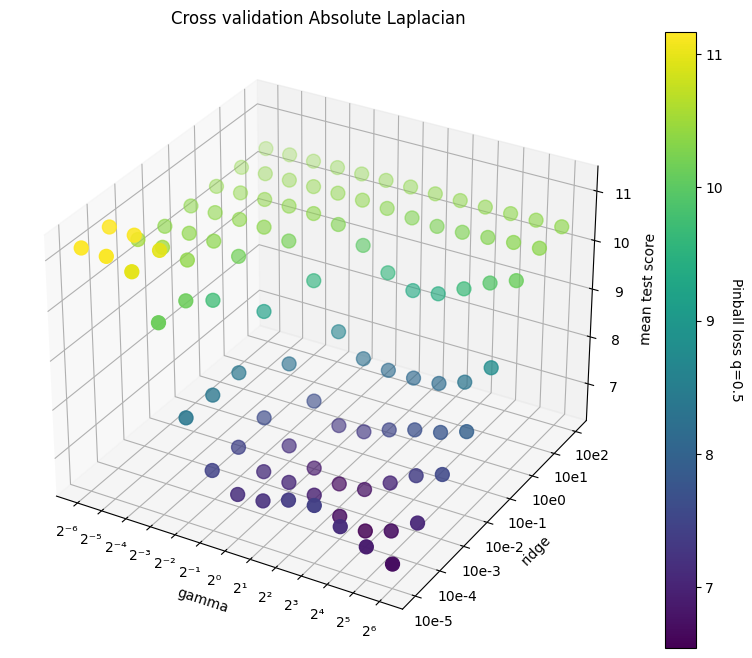

In [218]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# data
C = cv_results["log_10_param_C"]
gamma = cv_results["log2_param_gamma"]
mean_test_score = -cv_results["mean_test_score"]

# plot
scatter = ax.scatter(gamma,C, mean_test_score, c=mean_test_score, cmap="viridis", s=100)
ax.set_ylabel("ridge")
ax.set_xlabel("gamma")
ax.set_zlabel("mean test score")
ax.set_title("Cross validation Absolute Laplacian")



# color bar
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel("Pinball loss q=0.5", rotation=-90, va="bottom")

# ticks
ax.set_xticks(gamma.unique())
ax.set_xticklabels(["2⁻⁶","2⁻⁵","2⁻⁴","2⁻³","2⁻²","2⁻¹","2⁰","2¹","2²","2³","2⁴","2⁵","2⁶"])

ax.set_yticks(C.unique())
ax.set_yticklabels([f"10e{i}" for i in range(-5,3)])

plt.show()

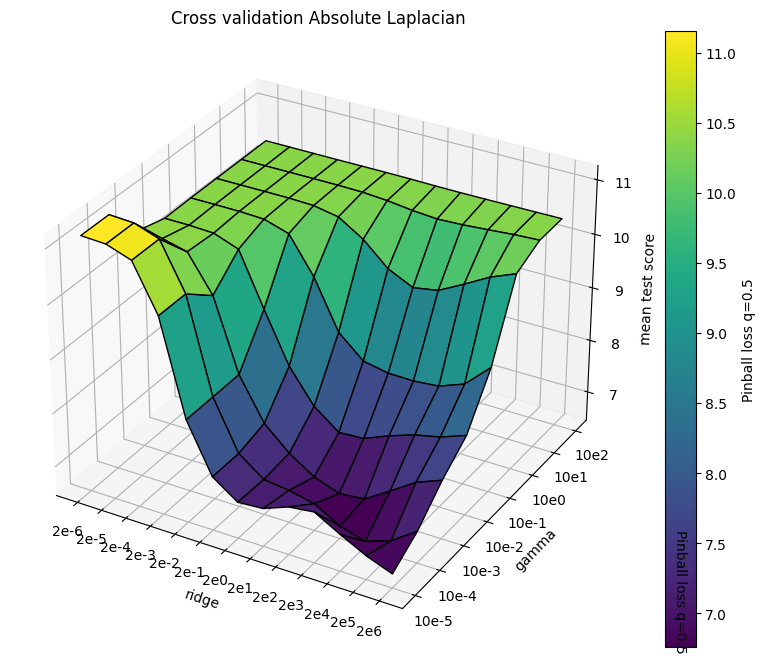

In [136]:
# surface
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# data
C = cv_results["log_10_param_C"]
gamma = cv_results["log2_param_gamma"]
mean_test_score = -cv_results["mean_test_score"]

C_unique = np.unique(C)
gamma_unique = np.unique(gamma)
C_grid, gamma_grid = np.meshgrid(C_unique, gamma_unique)

mean_test_score_grid = mean_test_score.values.reshape(len(C_unique),len(gamma_unique)).T

# plot
surface = ax.plot_surface(gamma_grid,C_grid, mean_test_score_grid, cmap=cm.viridis, edgecolor='k')
ax.set_xlabel("ridge")
ax.set_ylabel("gamma")
ax.set_zlabel("mean test score")
ax.set_title("Cross validation Absolute Laplacian")


# color bar
cbar = plt.colorbar(surface)
cbar.set_label("Pinball loss q=0.5")
cbar.ax.set_xlabel("Pinball loss q=0.5", rotation=-90, va="bottom")

# ticks
ax.set_xticks(gamma.unique())
ax.set_xticklabels([f"2e{i}" for i in range(-6,7)])

ax.set_yticks(C.unique())
ax.set_yticklabels([f"10e{i}" for i in range(-5,3)])



plt.show()